# Chapter 3, Coding

In [1]:
from Chapter3.OutlierDetection import DistributionBasedOutlierDetection
from Chapter3.OutlierDetection import DistanceBasedOutlierDetection
from util.VisualizeDataset import VisualizeDataset
import copy
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

## 3.6.1.2

In [13]:
# read data (chapter 2 result)
dataset_path = './intermediate_datafiles/'
dataset = pd.read_csv(dataset_path + 'chapter2_result.csv', index_col=0, nrows=10000)

In [14]:
# Determine the columns we want to experiment on.
outlier_columns = ['acc_phone_x', 'light_phone_lux']

# Create visualization class.
DataViz = VisualizeDataset()

# Create the outlier classes.
OutlierDistr = DistributionBasedOutlierDetection()
OutlierDist = DistanceBasedOutlierDetection()
dataset.index = dataset.index.to_datetime()

## Distribution-based: Chauvenets Criterion

1


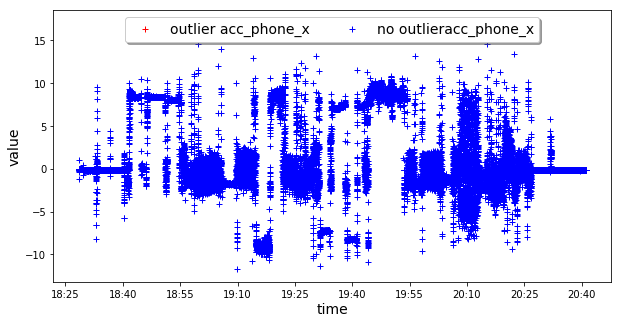

10


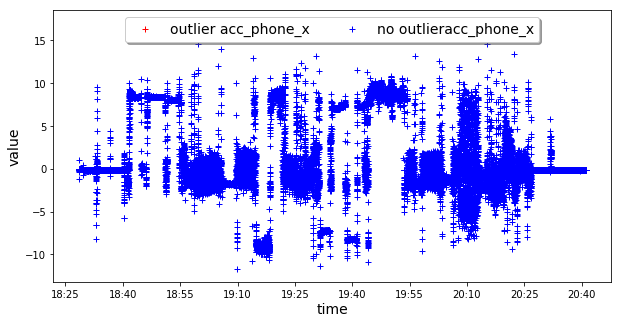

20


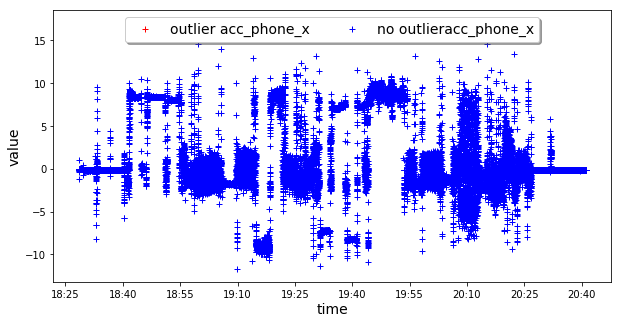

50


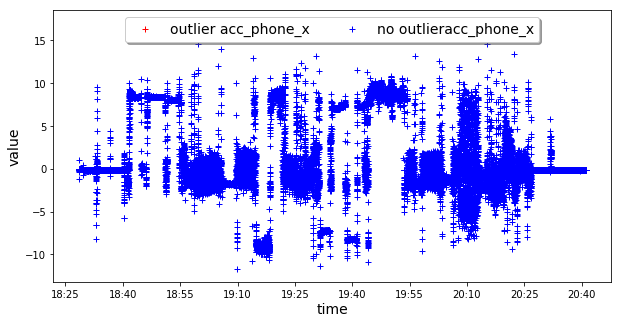

100


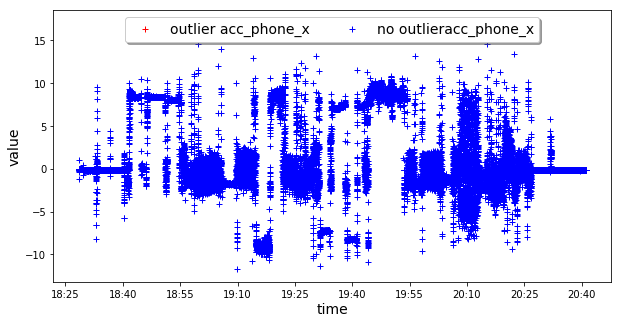

1


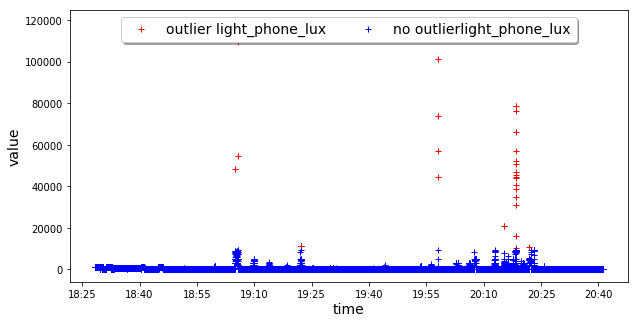

10


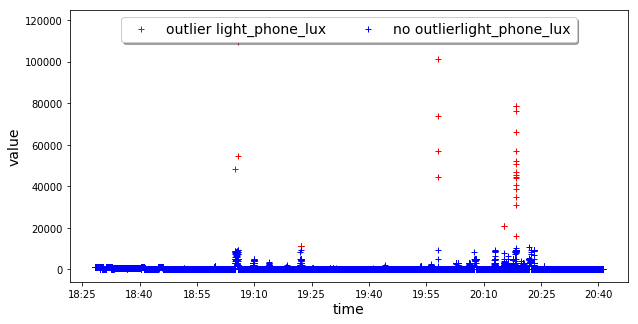

20


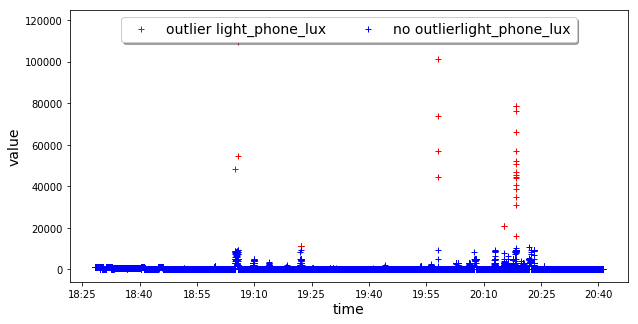

50


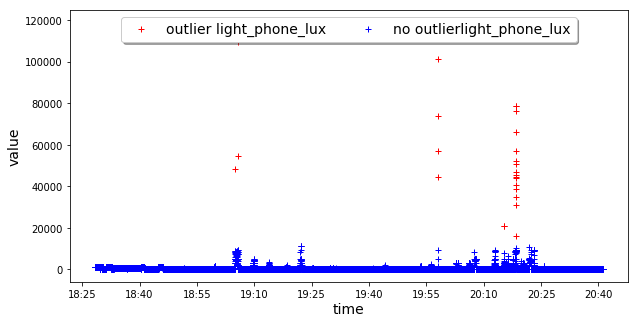

100


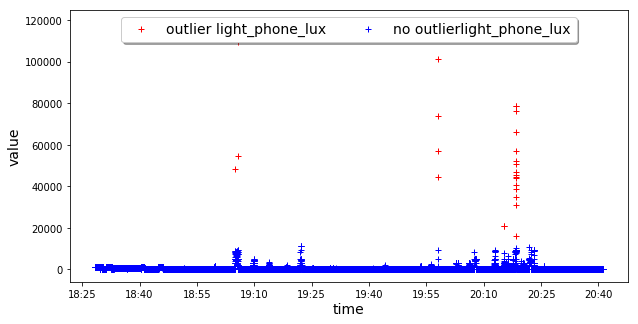

In [5]:
for col in outlier_columns:
    for c in [1, 10, 20, 50, 100]:
        dataset_chauvenet = OutlierDistr.chauvenet(dataset, col, c)
        DataViz.plot_binary_outliers(dataset_chauvenet, col, col + '_outlier')

## Distribution-based: Mixture Models

1 1


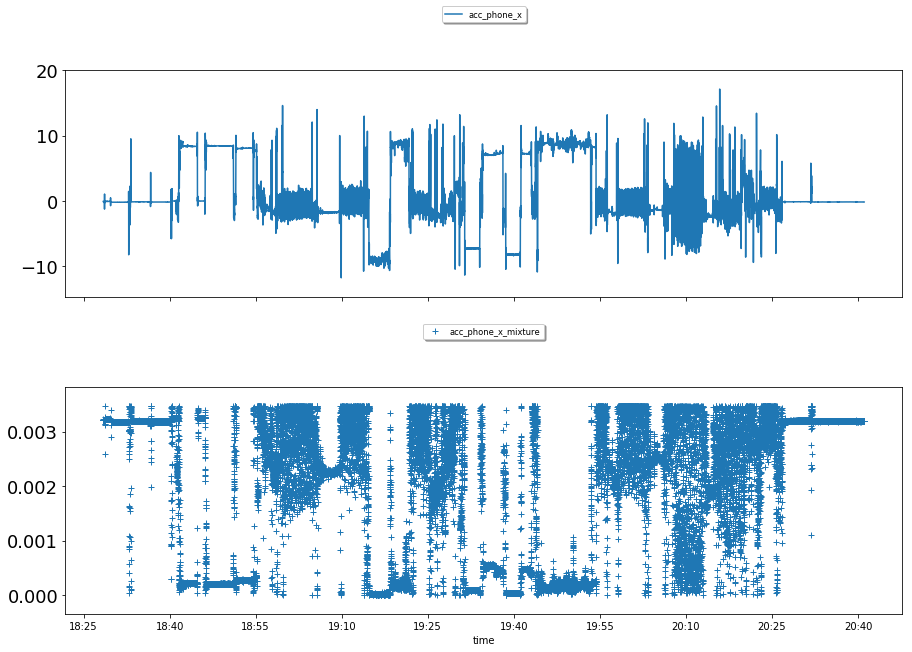

1 2


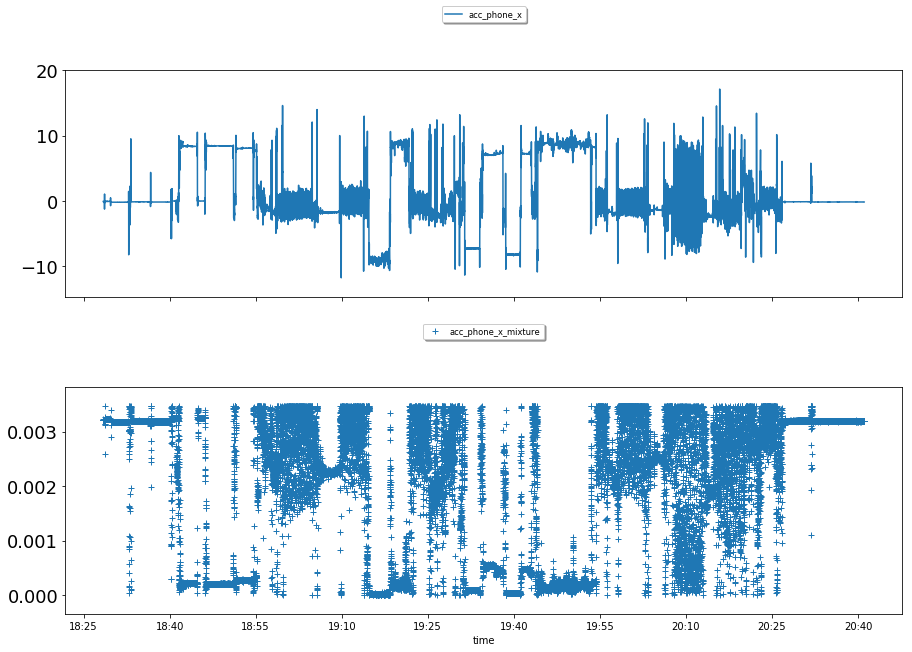

1 4


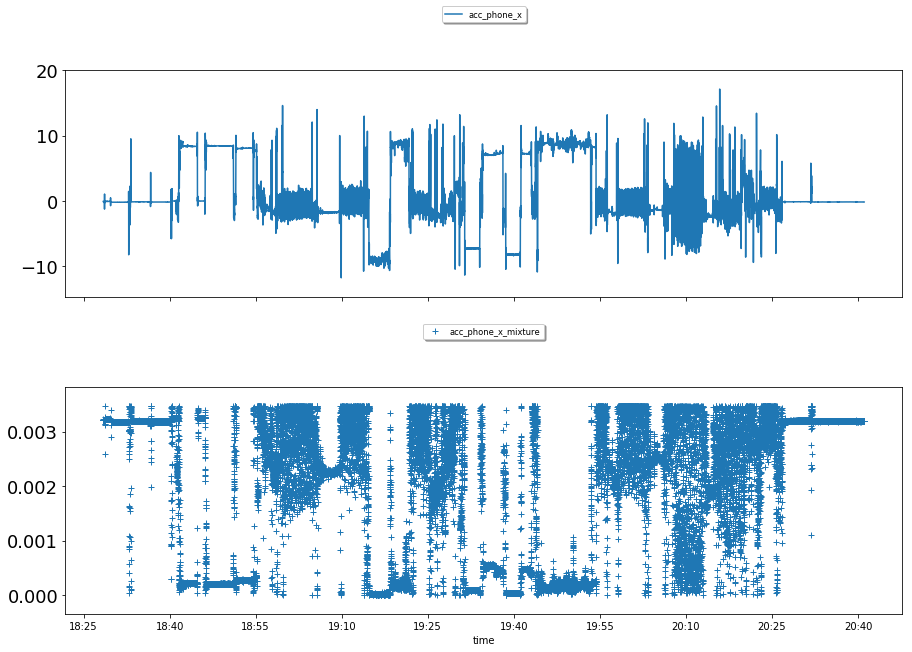

3 1


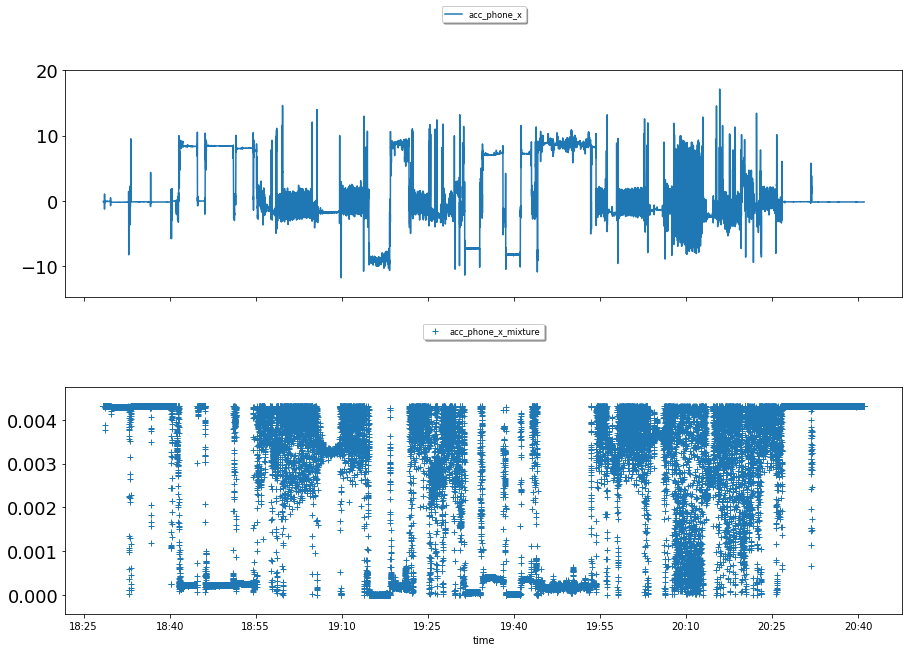

3 2


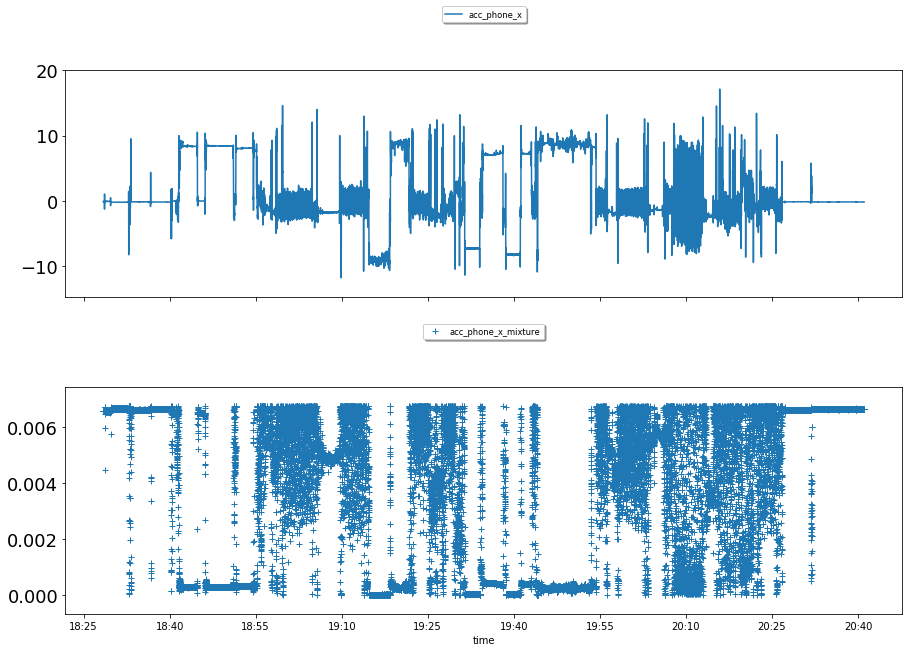

3 4


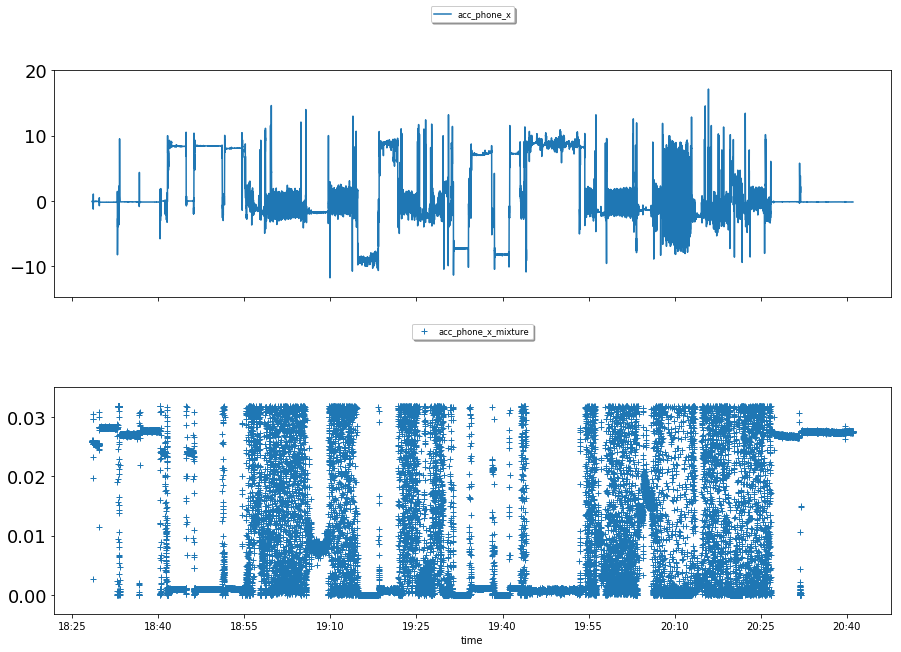

5 1


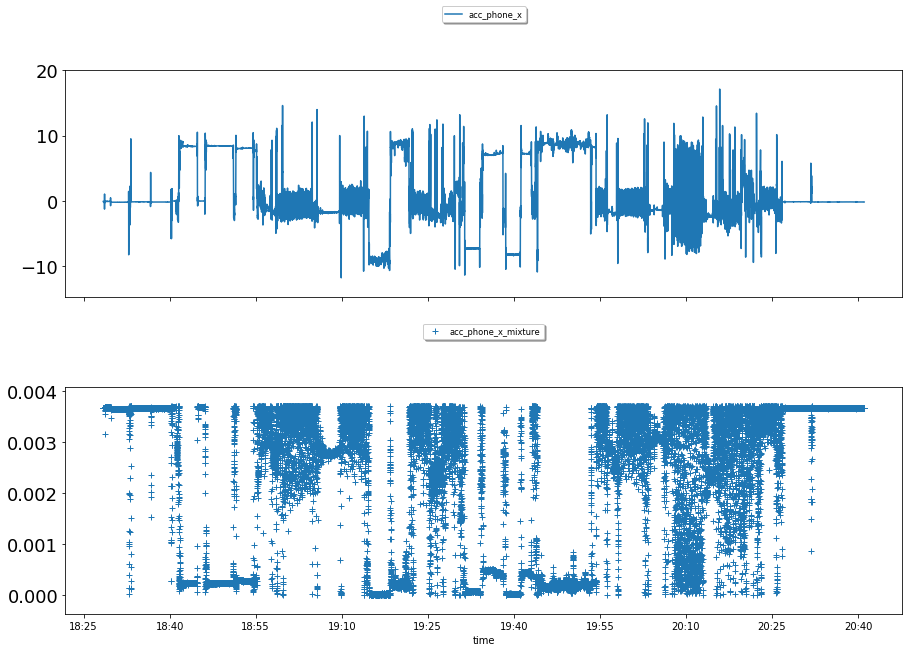

5 2


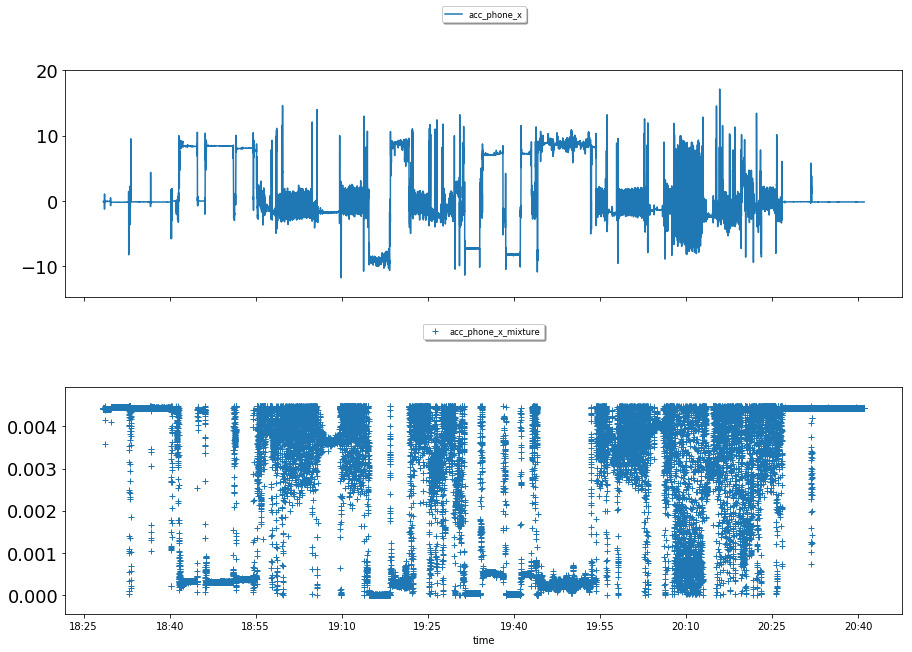

5 4


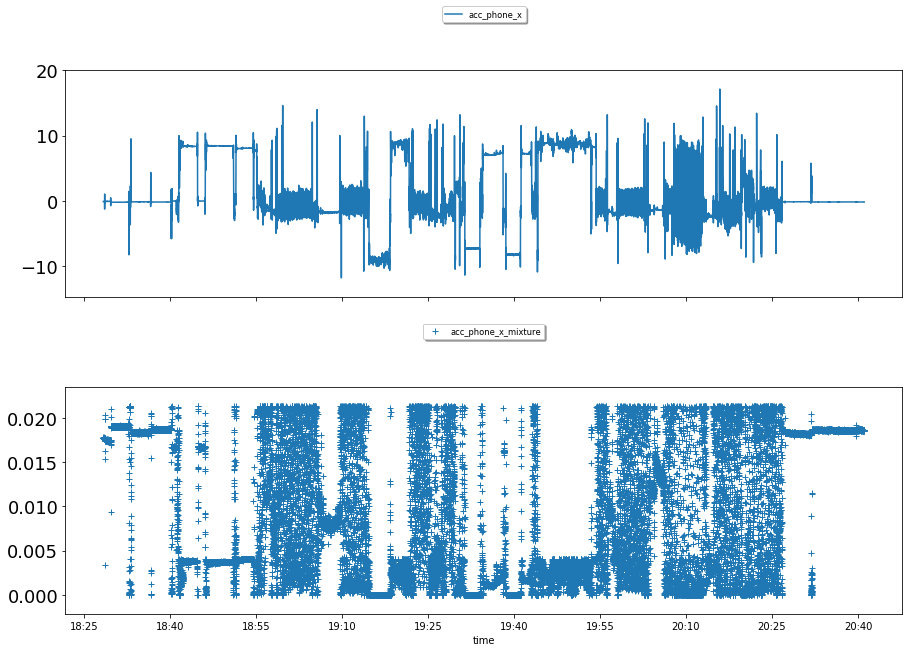

7 1


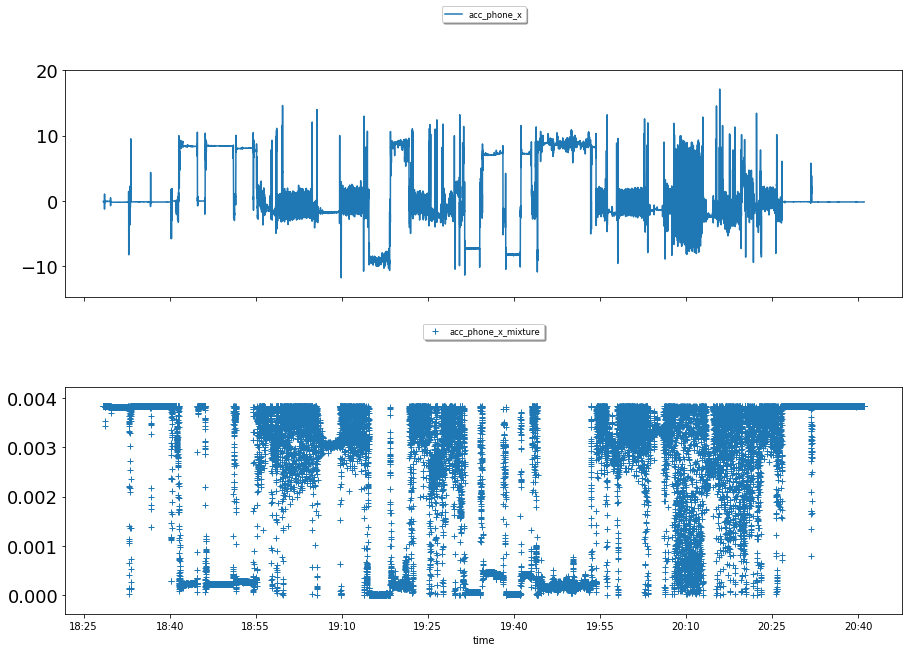

7 2


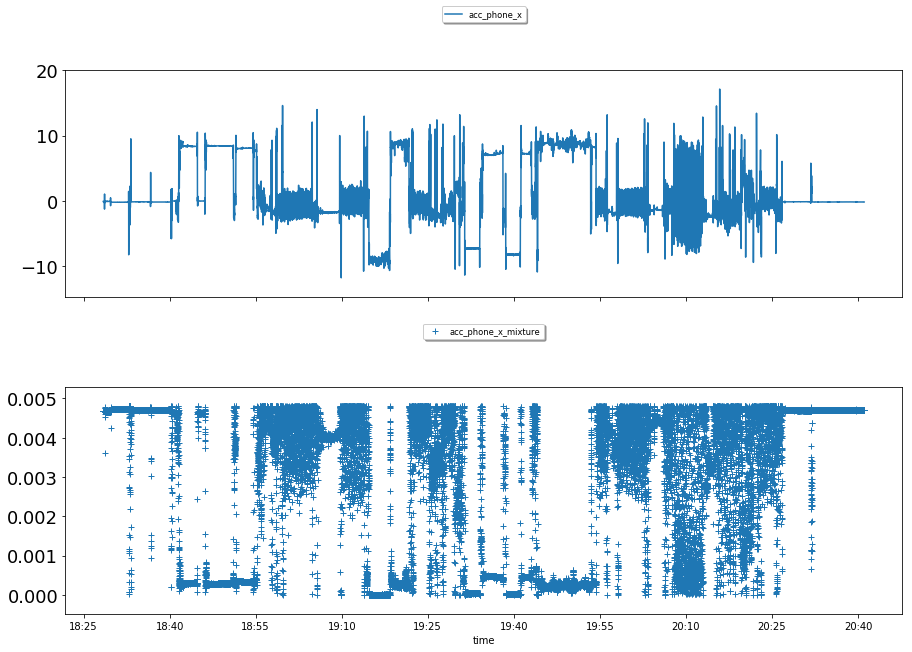

7 4


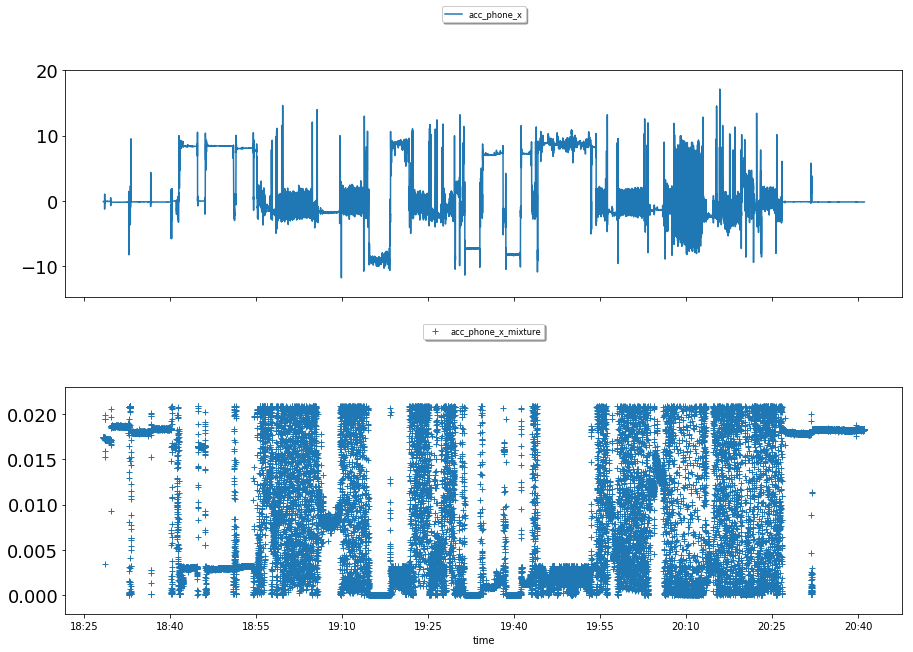

1 1


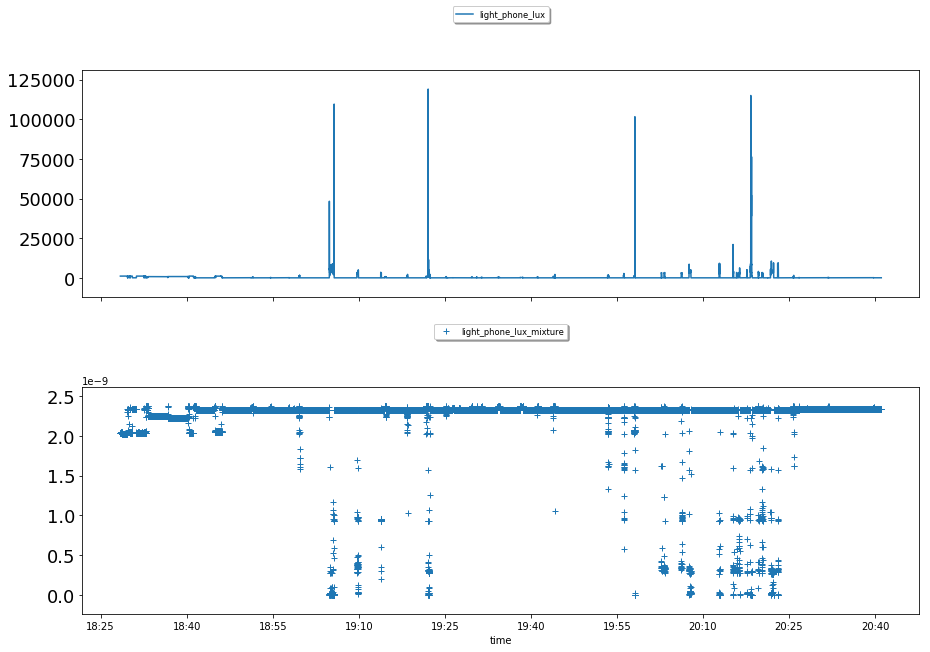

1 2


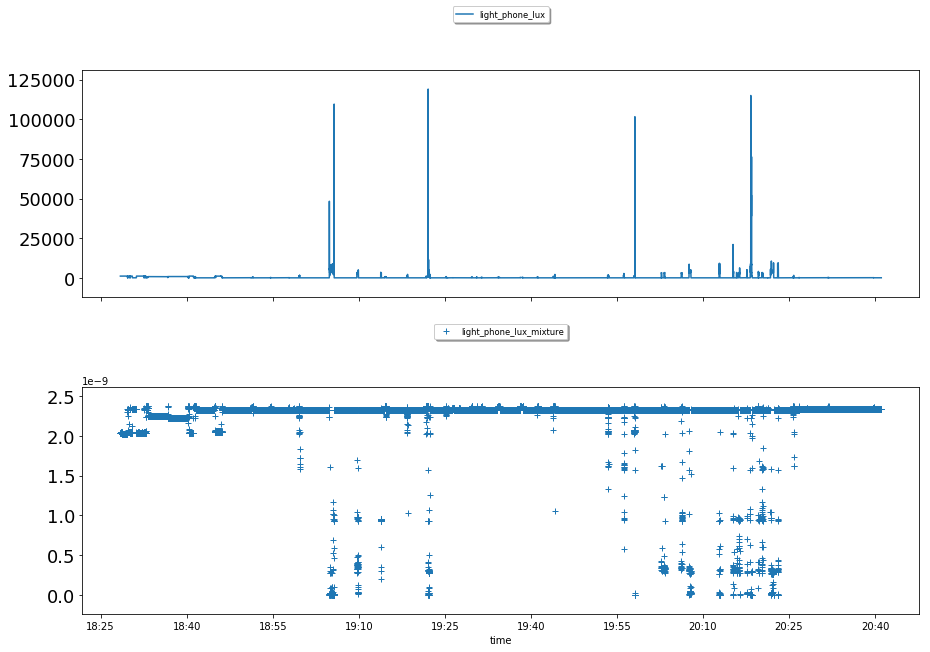

1 4


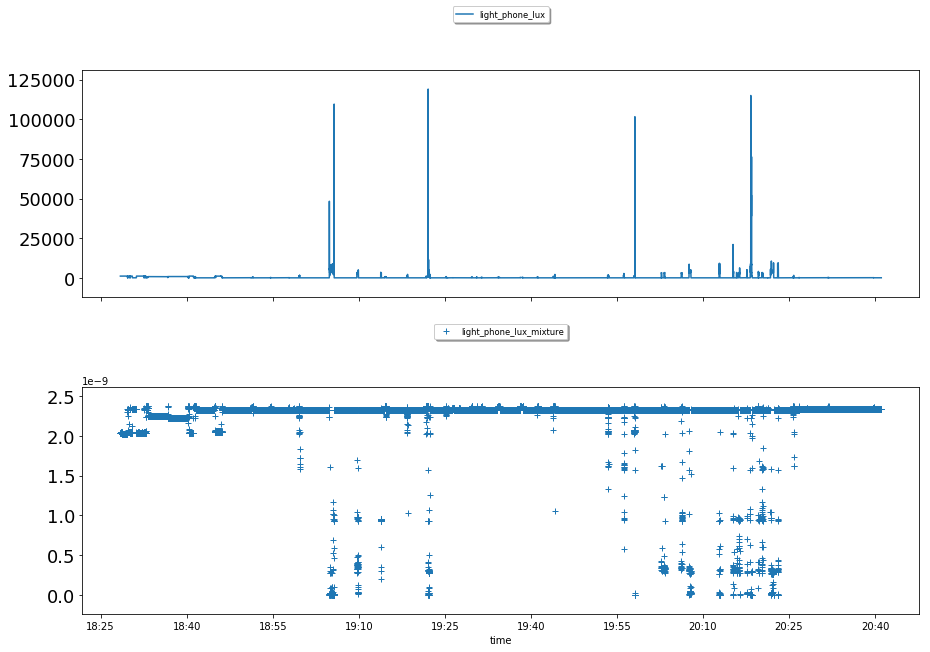

3 1


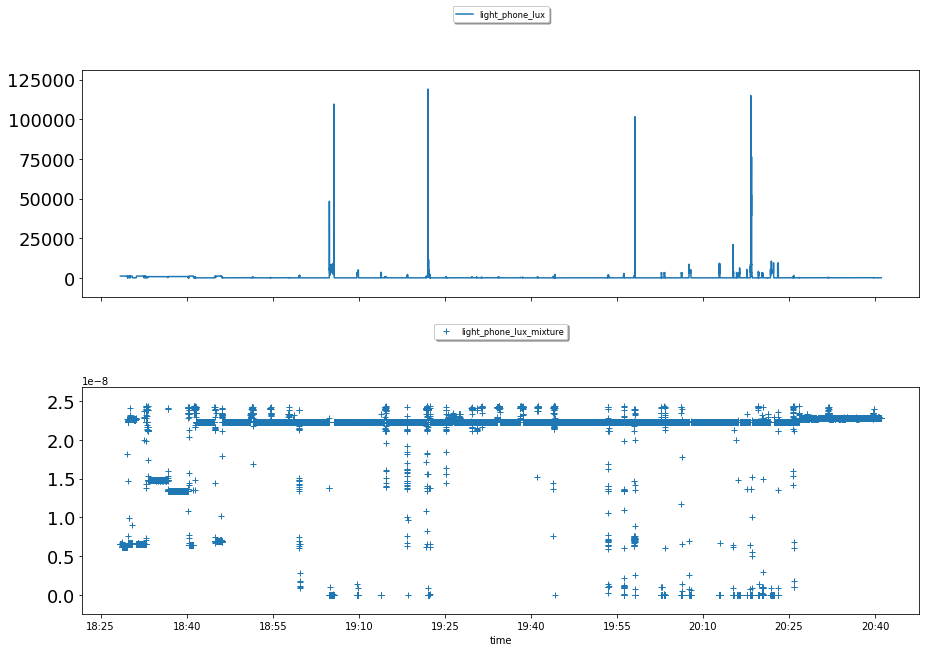

3 2


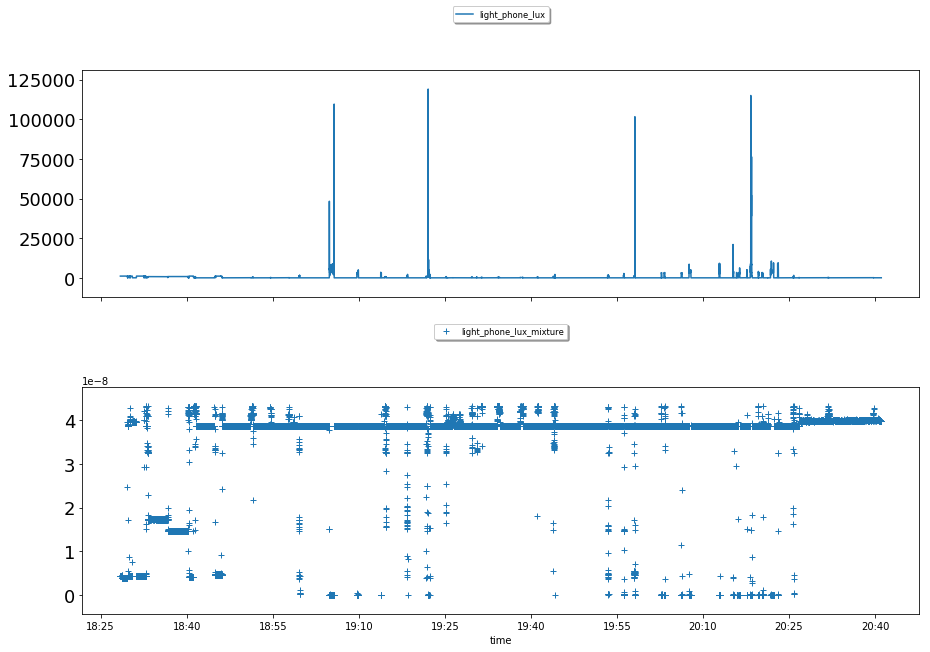

3 4


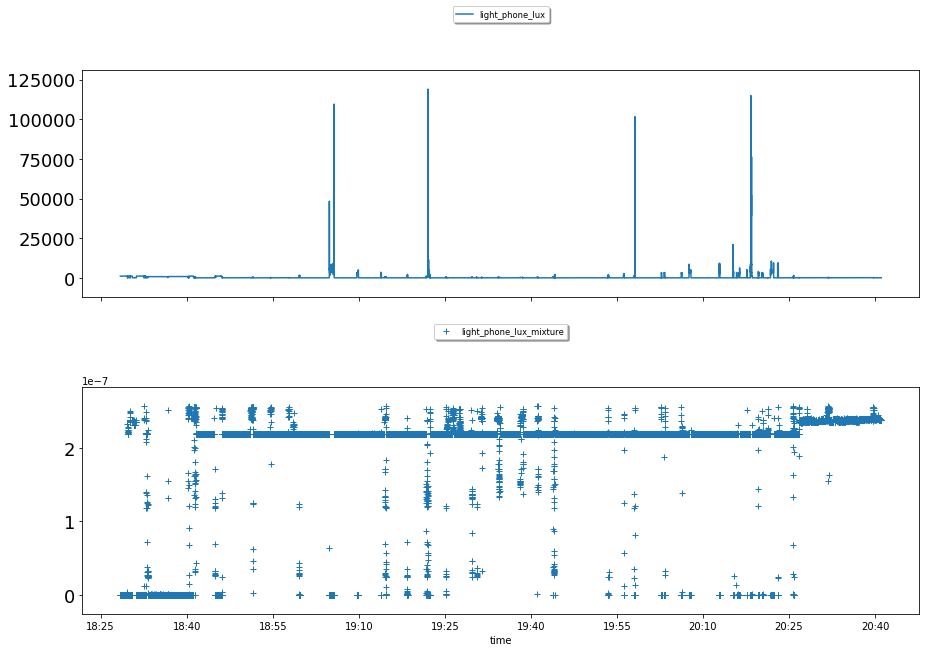

5 1


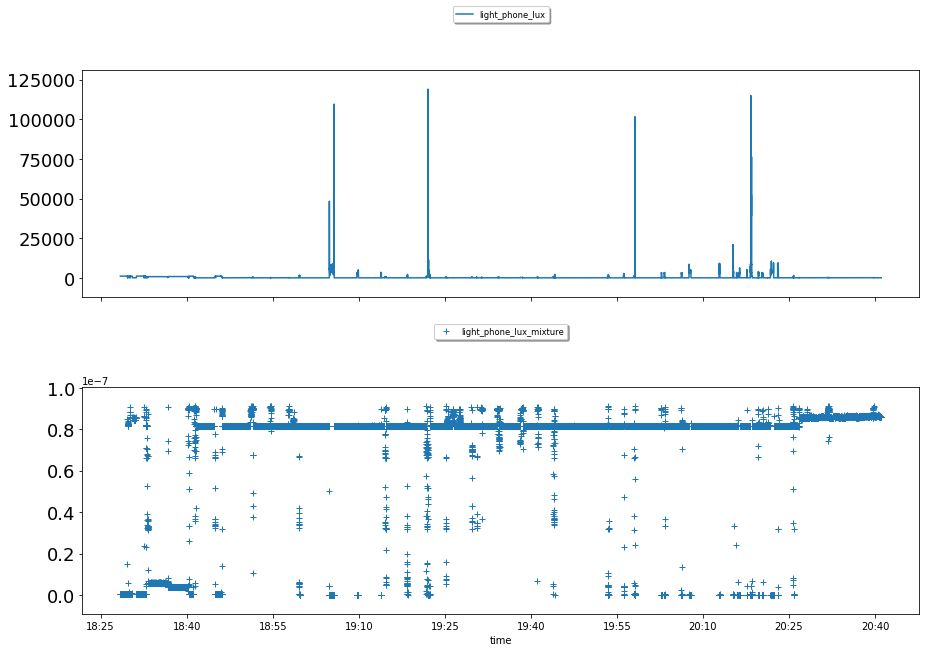

5 2


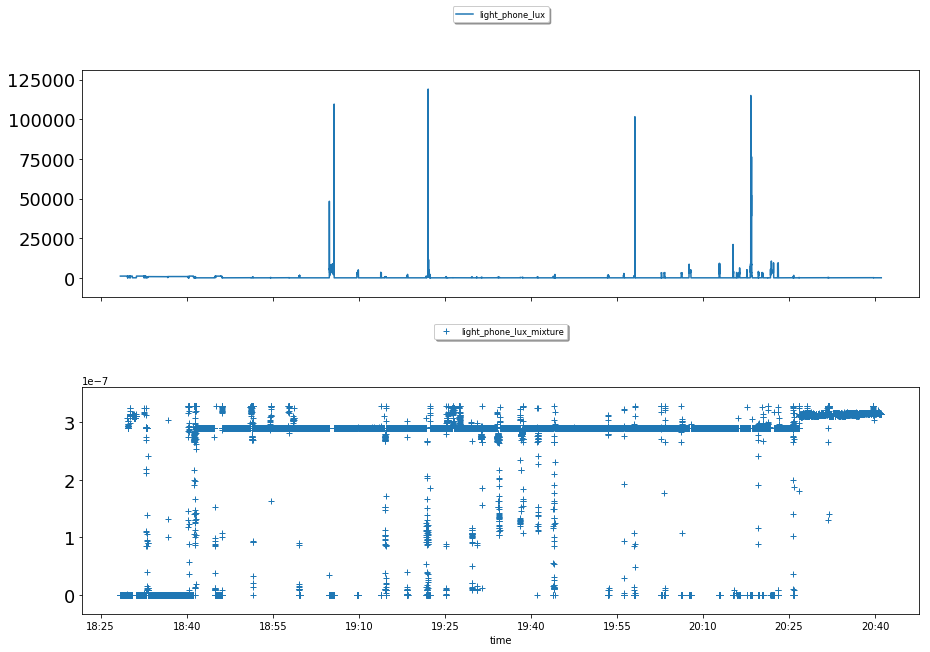

5 4


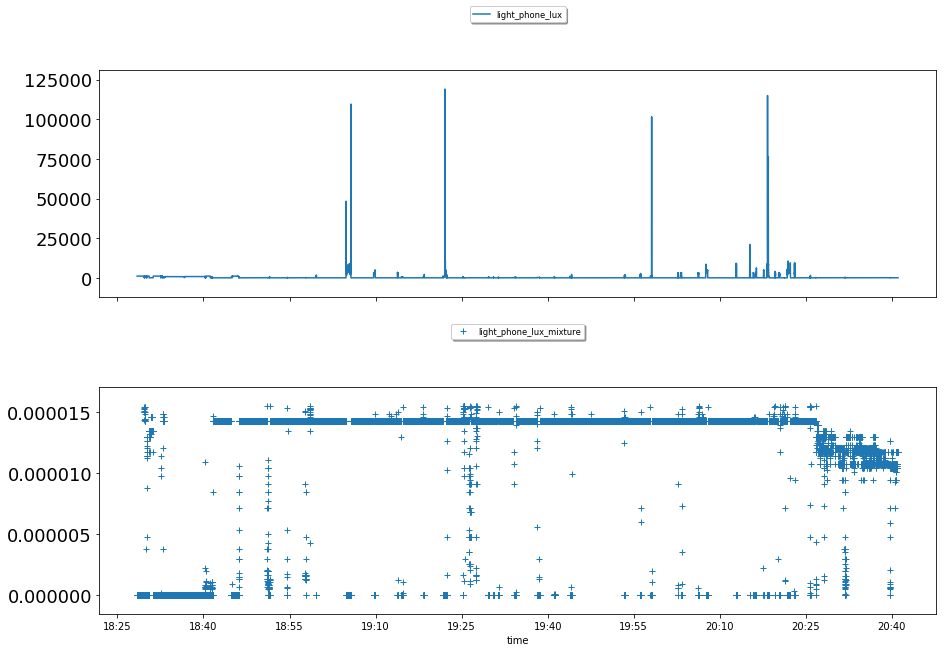

7 1


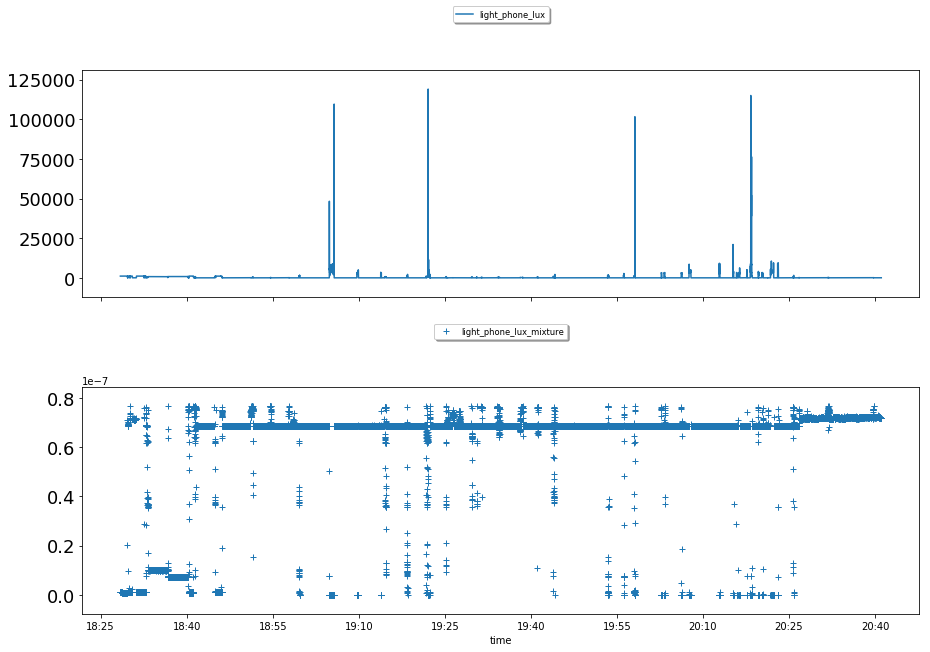

7 2


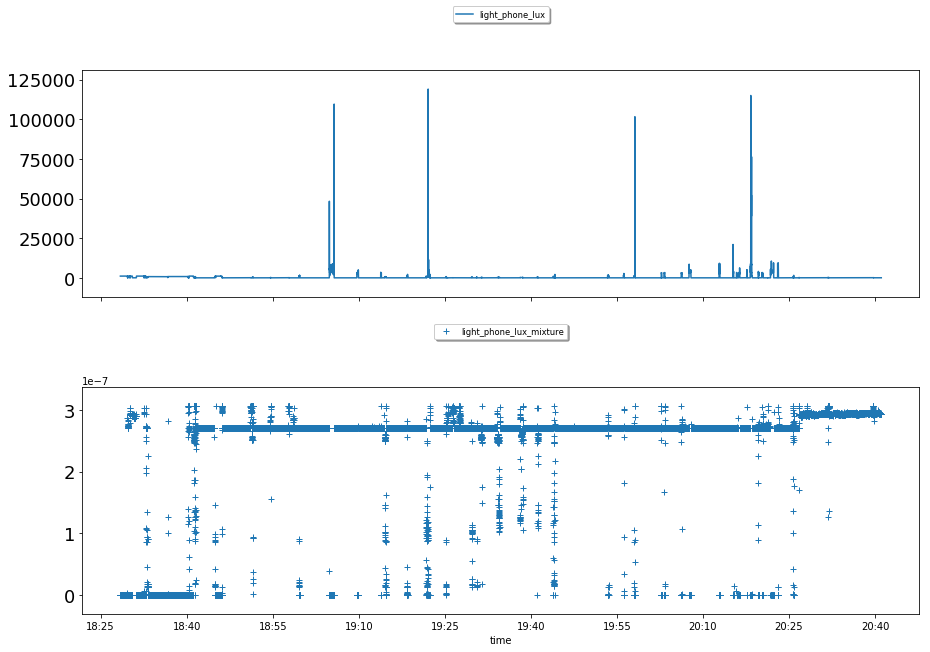

7 4


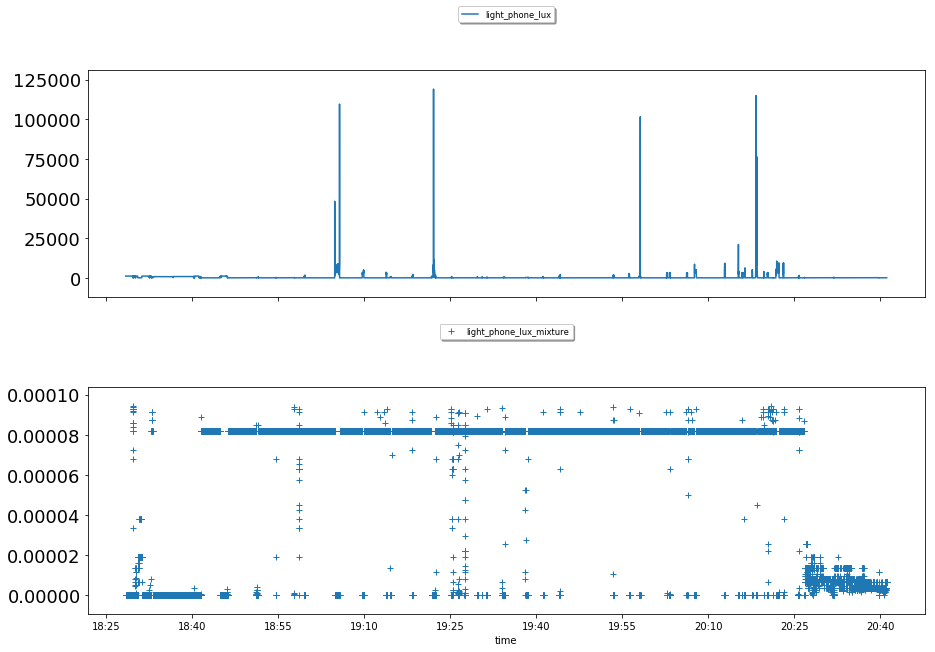

In [6]:
for col in outlier_columns:
    for comps in [1, 3, 5, 7]:
        for iters in [1, 2, 4]:
            print comps, iters
            dataset_mixture = OutlierDistr.mixture_model(dataset, col, comps, iters)
            DataViz.plot_dataset(dataset_mixture, [col, col + '_mixture'], ['exact','exact'], ['line', 'points'])

## Distance-Based: Simple Distance-Based Approach

0.1 0.99


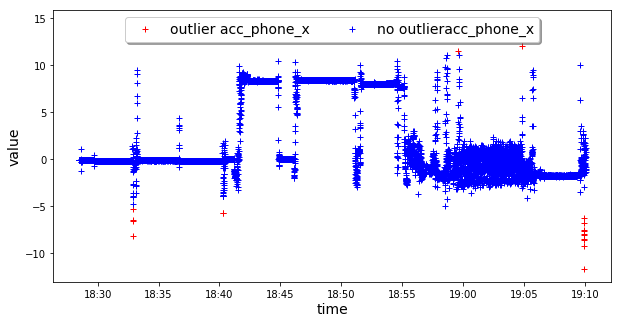

0.01 0.99


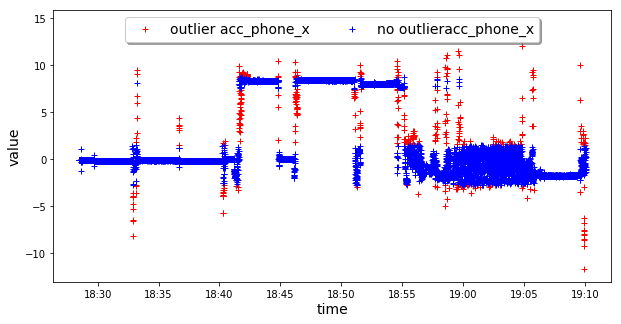

0.4 0.99


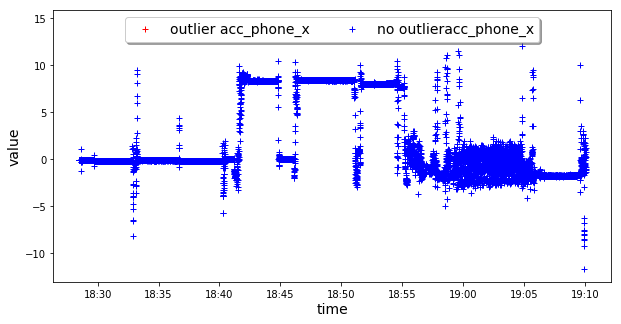

0.1 0.8


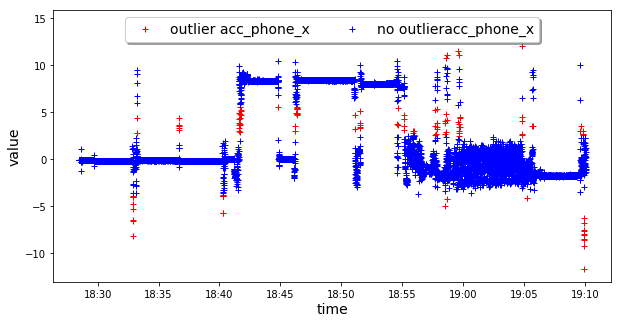

0.1 0.7


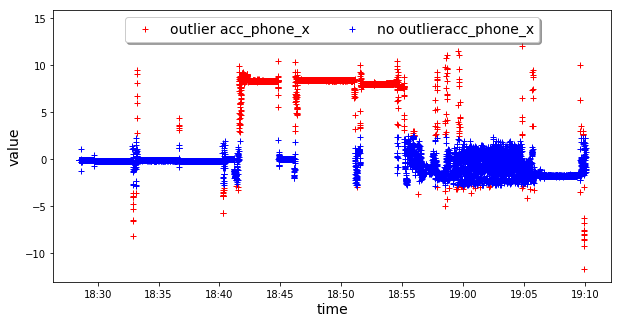

0.1 0.5


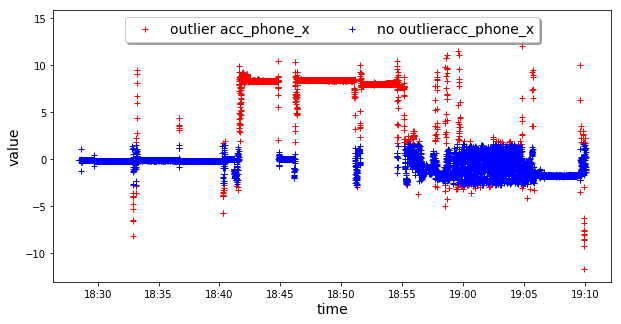

0.1 0.99


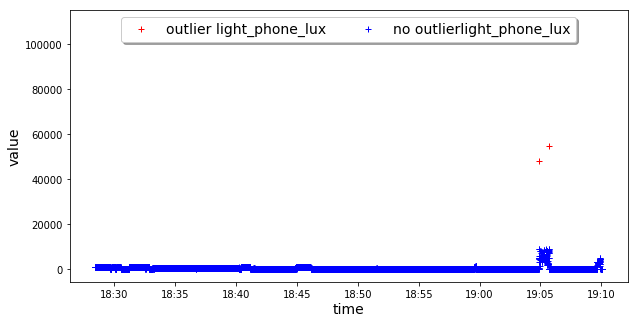

0.01 0.99


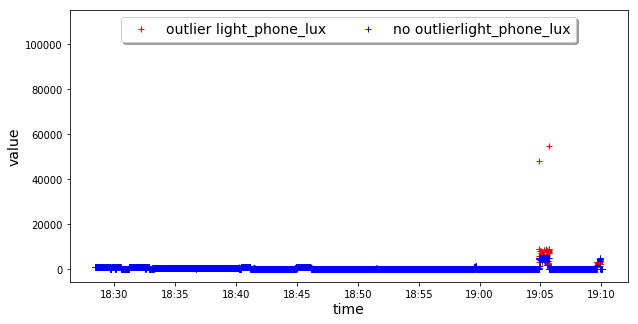

0.4 0.99


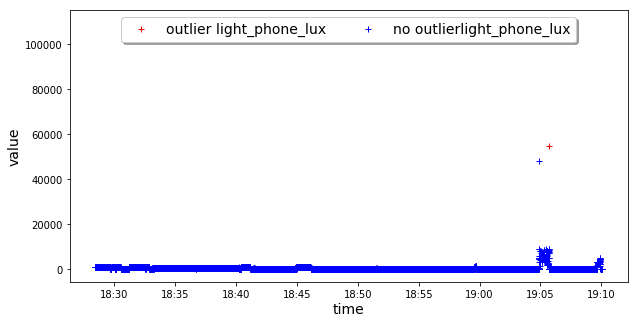

0.1 0.8


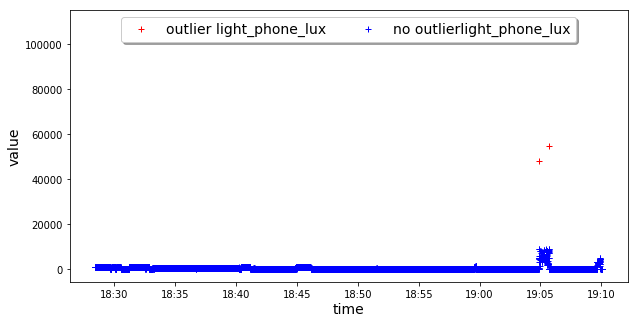

0.1 0.7


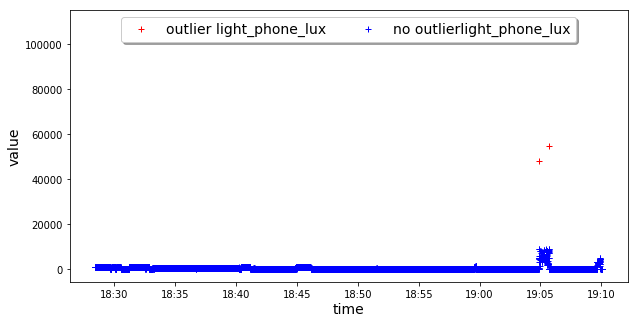

0.1 0.5


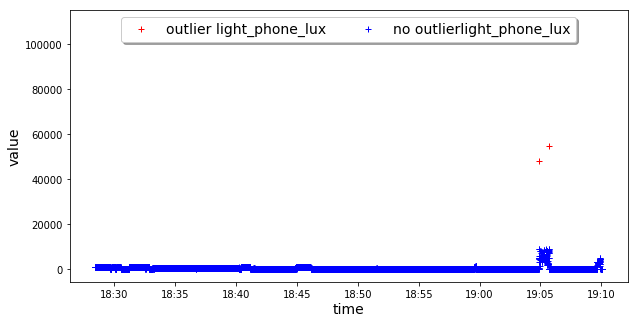

In [15]:
warnings.filterwarnings("ignore", category=DeprecationWarning)
for col in outlier_columns:
    for dmin, fmin in [[0.10, 0.99], [0.01, 0.99], [0.40, 0.99], [0.10, 0.8], [0.10, 0.7], [0.10, 0.5]]:
        print dmin, fmin
        dataset_simple = OutlierDist.simple_distance_based(dataset, [col], 'euclidean', dmin, fmin)
        DataViz.plot_binary_outliers(dataset_simple, col, 'simple_dist_outlier')

## Distance-Based: Local Outlier Factor

1


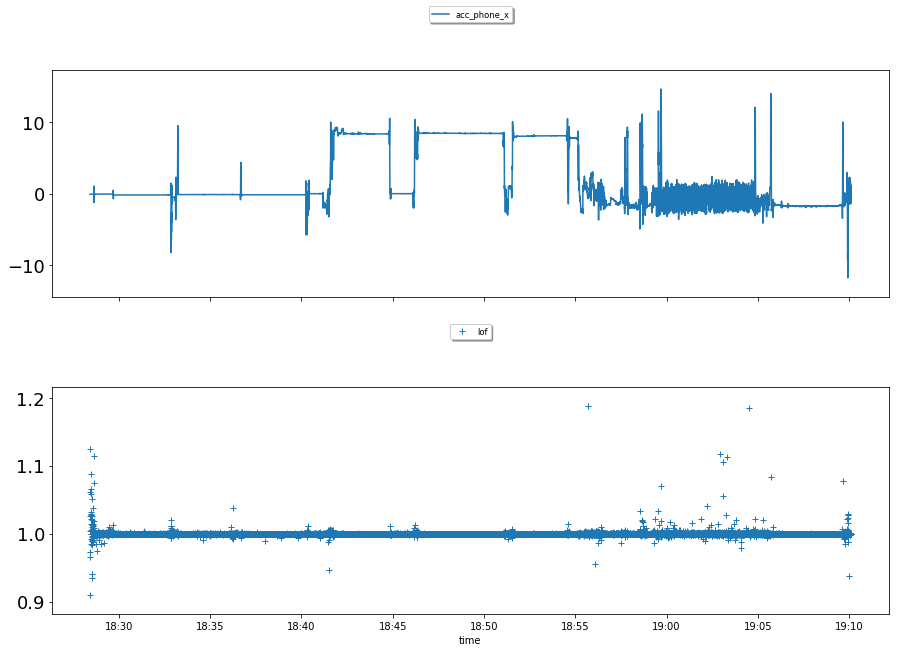

2


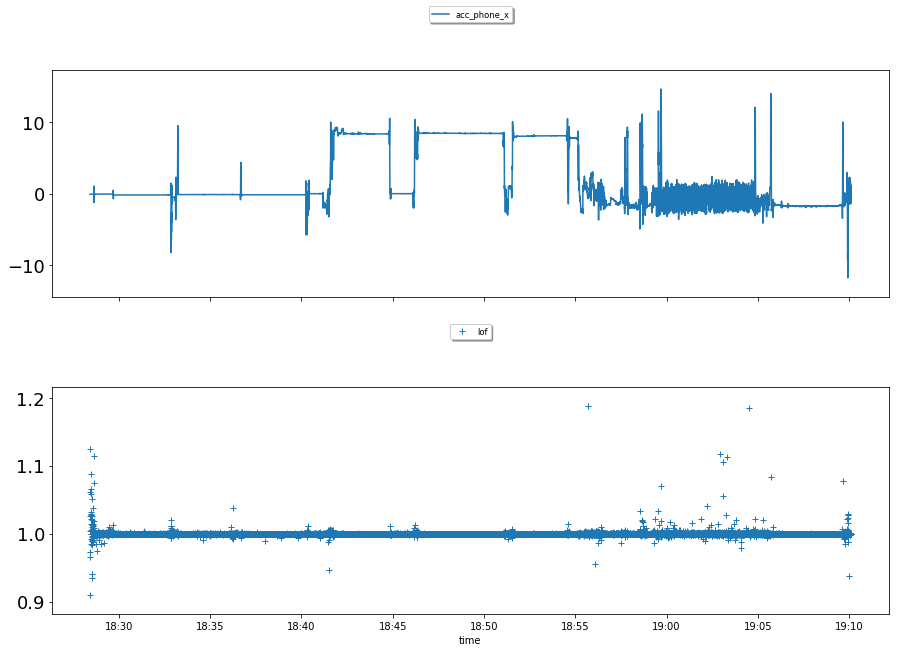

5


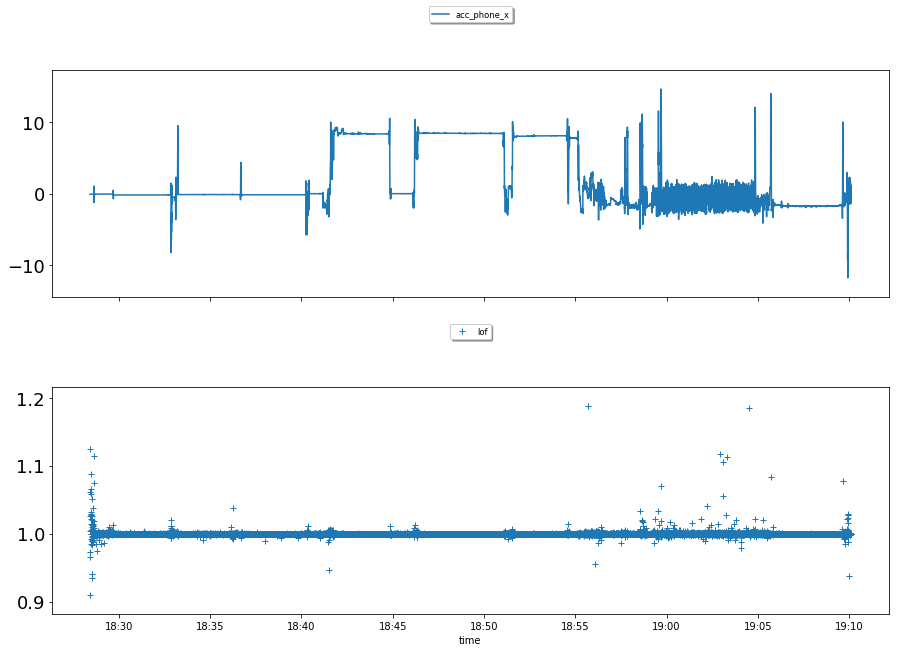

7


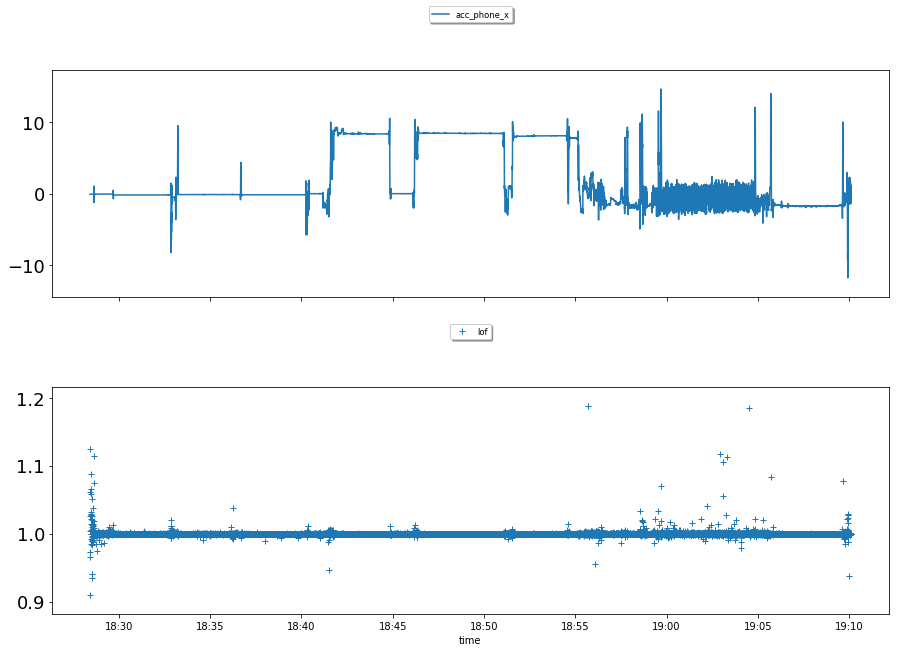

10


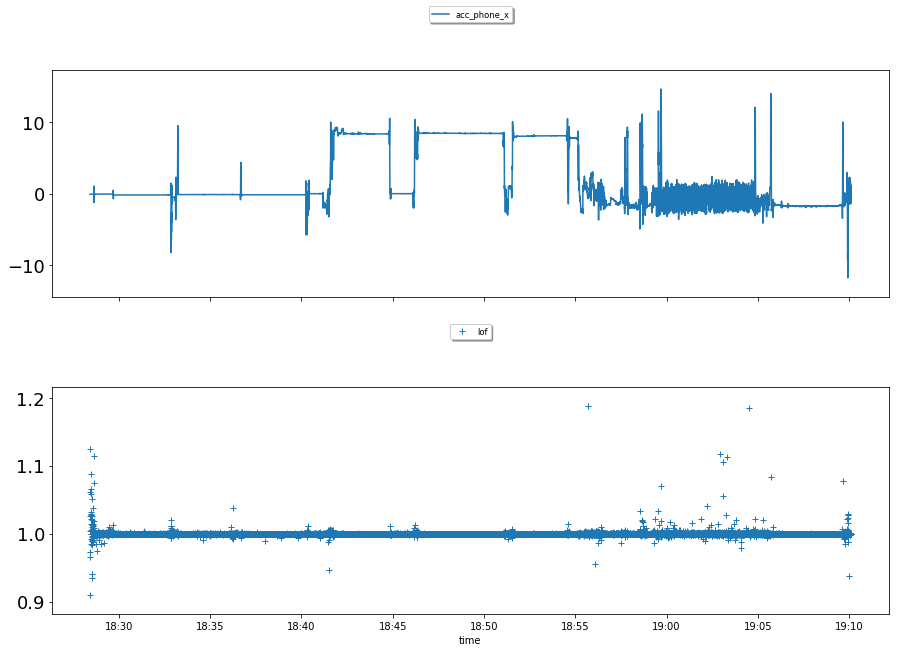

1


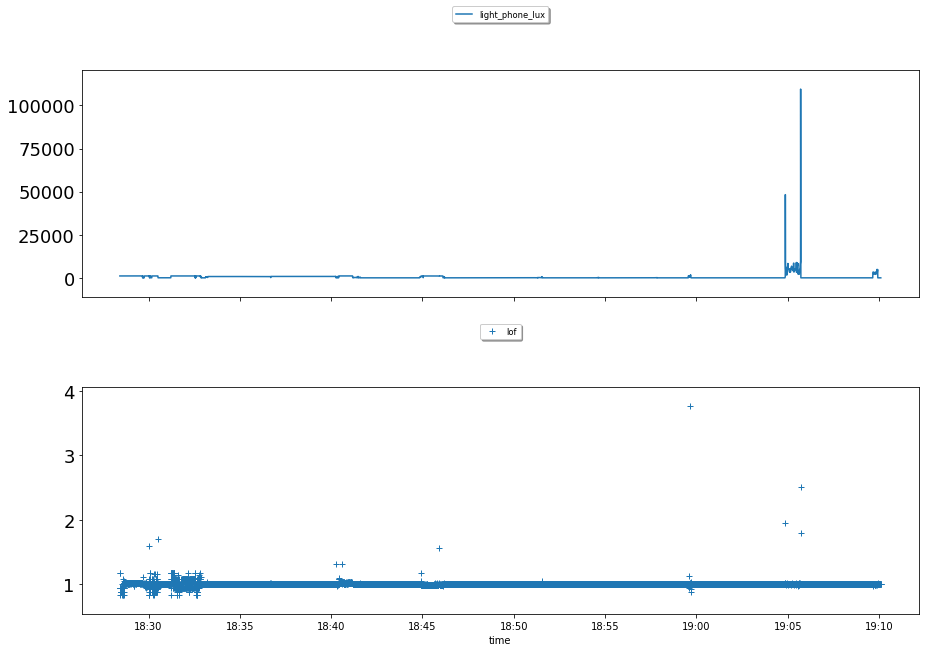

2


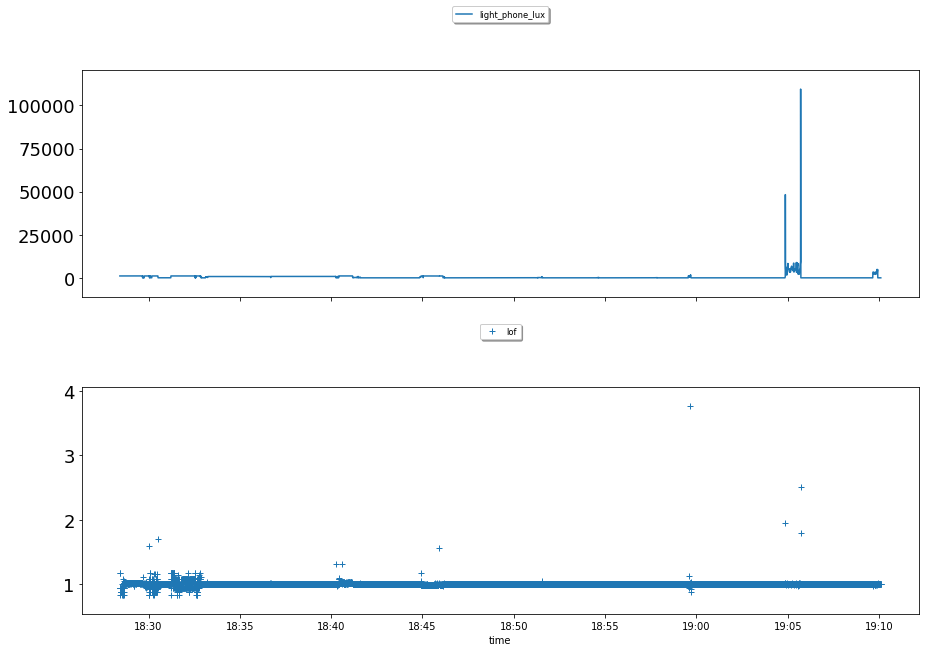

5


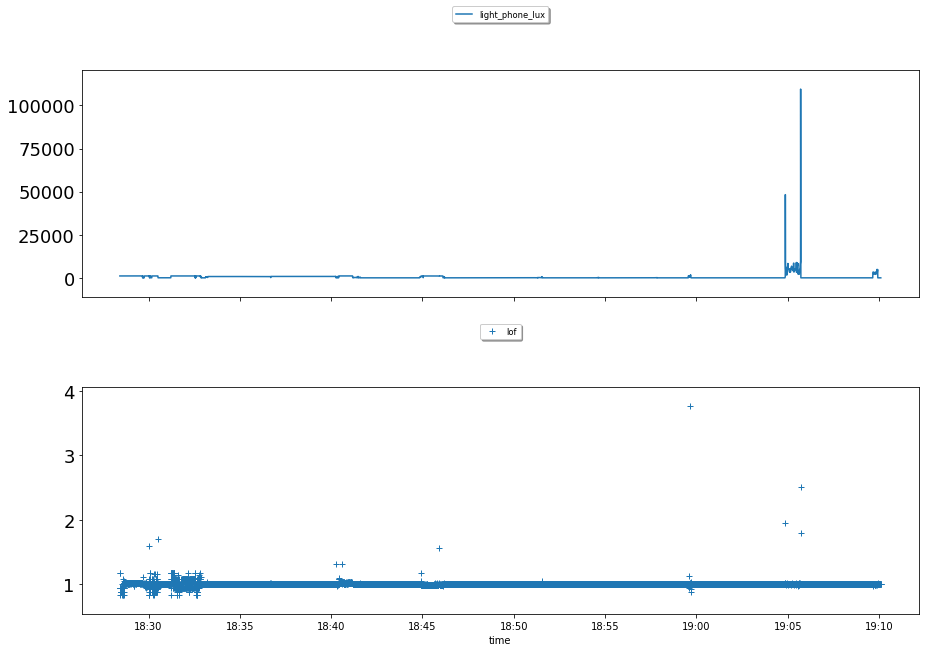

7


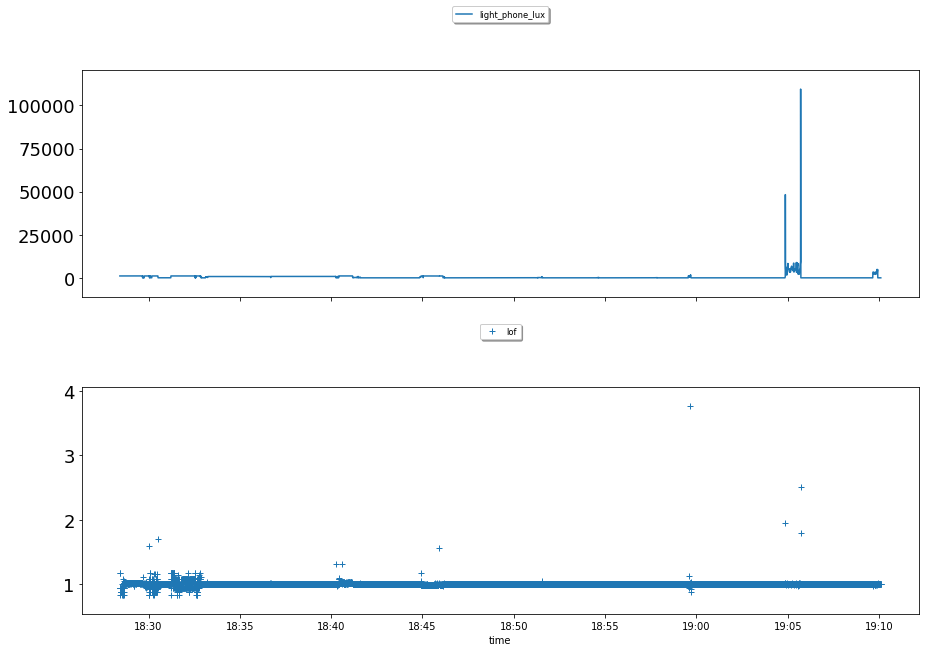

10


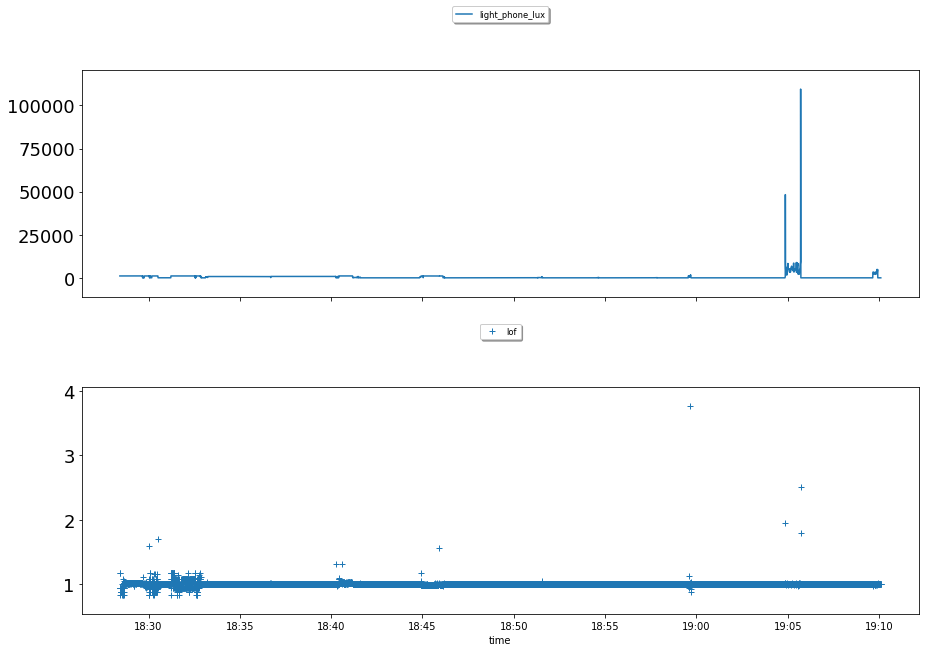

In [16]:
for col in outlier_columns:
    for k in [1, 2, 5, 7,10]:
        print k
        dataset_lof = OutlierDist.local_outlier_factor(dataset, [col], 'euclidean', 5)
        DataViz.plot_dataset(dataset_lof, [col, 'lof'], ['exact','exact'], ['line', 'points'])

In [10]:
dataset.columns

Index([u'acc_phone_x', u'acc_phone_y', u'acc_phone_z', u'acc_watch_x',
       u'acc_watch_y', u'acc_watch_z', u'gyr_phone_x', u'gyr_phone_y',
       u'gyr_phone_z', u'gyr_watch_x', u'gyr_watch_y', u'gyr_watch_z',
       u'hr_watch_rate', u'labelOnTable', u'labelSitting',
       u'labelWashingHands', u'labelWalking', u'labelStanding',
       u'labelDriving', u'labelEating', u'labelRunning', u'light_phone_lux',
       u'mag_phone_x', u'mag_phone_y', u'mag_phone_z', u'mag_watch_x',
       u'mag_watch_y', u'mag_watch_z', u'press_phone_pressure',
       u'acc_phone_x_outlier', u'light_phone_lux_outlier'],
      dtype='object')